# Title : Heart Disease Prediction
# Date : 29.04.2024
# Caption : This project aims to predict heart disease using the heart disease dataset from the UCI Machine Learning Repository. The dataset contains various medical test results and other attributes that can be used to predict the presence of heart disease in an individual. The analysis will involve data preprocessing, exploratory data analysis, feature engineering, model building, and evaluation. The goal is to develop a classification model that can accurately predict whether an individual has heart disease based on relevant input variables such as age and medical test results. The emphasis is on building a model that can achieve high accuracy and generalizability to new data.

# 1. Main Objective of the Analysis

#### The primary goal of the analysis is to develop a classification model that can accurately predict whether an individual has heart disease based on relevant input variables such as age and medical test results. The emphasis is on building a model that can achieve high accuracy and generalizability to new data.

# 2. Brief description of the dataset I chose and a summary of its attributes.

### The dataset chosen for this analysis is  
### The dataset contains the following attributes:
##### 1. Age: The age of the individual
##### 2. Sex: 
##### 3. Chest Pain Type:
##### 4. Resting Blood Pressure:
##### 5. Cholesterol:
##### 6. Fasting Blood Sugar:
##### 7. Resting Electrocardiographic Results:
##### 8. Maximum Heart Rate Achieved:
##### 9. Exercise Induced Angina:
##### 10. ST Depression Induced by Exercise Relative to Rest:
##### 11. Slope of the Peak Exercise ST Segment:
##### 12. Number of Major Vessels Colored by Flourosopy:
##### 13. Thal:
##### 14. Output: The presence of heart disease (0 = No, 1 = Yes)



## Import the required libraries


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the Dataset


In [91]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. About the Data



#### The primary goal of the analysis is to develop a classification model that can accurately predict whether an individual has heart disease based on relevant input variables such as age and medical test results. The emphasis is on building a model that can achieve high accuracy and generalizability to new data.

In [92]:
data.shape

(303, 14)

In [93]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [94]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [95]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## We understand that the dataset contains 303 rows and 14 columns. The columns represent various medical test results and other attributes that can be used to predict the presence of heart disease in an individual. The dataset includes attributes


In [97]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)
print("\nData shape:", data.shape)



Missing values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Data shape: (303, 14)


In [98]:
# Check for class imbalance
print(data['output'].value_counts())

output
1    165
0    138
Name: count, dtype: int64


In [99]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance from Logistic Regression:")
print(feature_importance)

Feature Importance from Logistic Regression:
     Feature  Importance
2         cp    0.792680
10       slp    0.629639
6    restecg    0.480332
5        fbs    0.167186
7   thalachh    0.018793
4       chol   -0.002924
0        age   -0.007079
3     trtbps   -0.015967
9    oldpeak   -0.647354
11       caa   -0.776525
12     thall   -0.917082
8       exng   -0.949210
1        sex   -1.408196


# 2. Data Preprocessing and Exploratory Data Analysis

In [100]:
X = data.drop(['output'], axis=1)

In [101]:
y = data['output']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
lr_predictions = model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
# Print the accuracy of the model
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8852459016393442


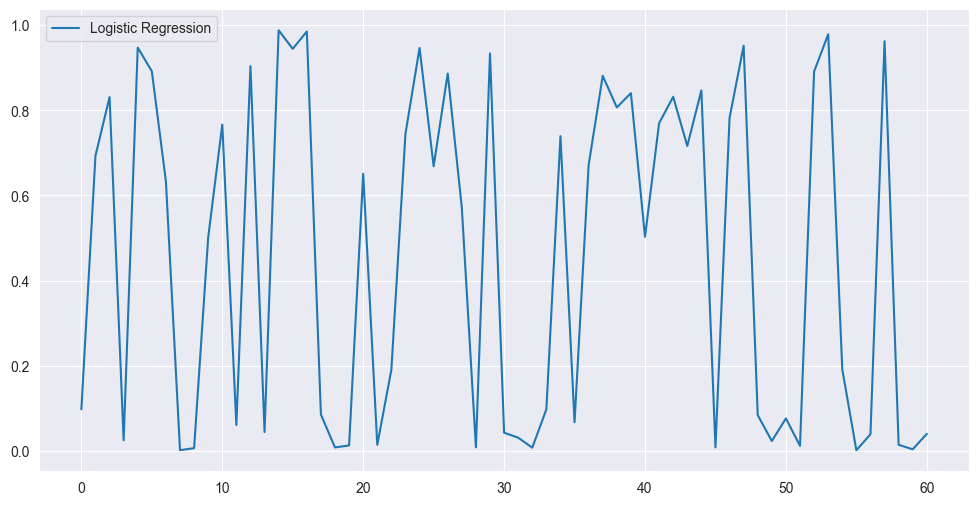

In [104]:
#visualize logistic regression function
plt.figure(figsize=(12, 6))
plt.plot(model_lr.predict_proba(X_test)[:,1], label='Logistic Regression')
plt.legend()
plt.show()



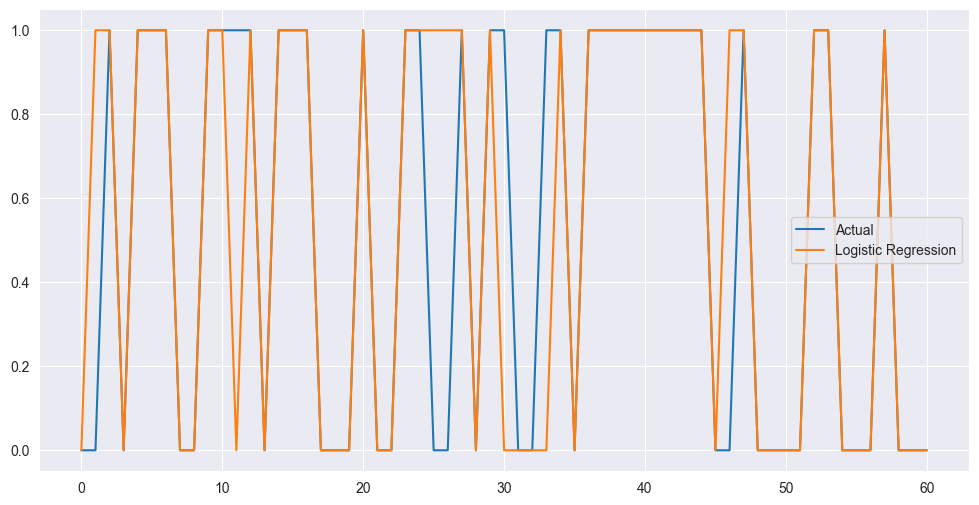

In [105]:
# visualize the predictions made by the model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(lr_predictions, label='Logistic Regression')
plt.legend()
plt.show()


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_predictions))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


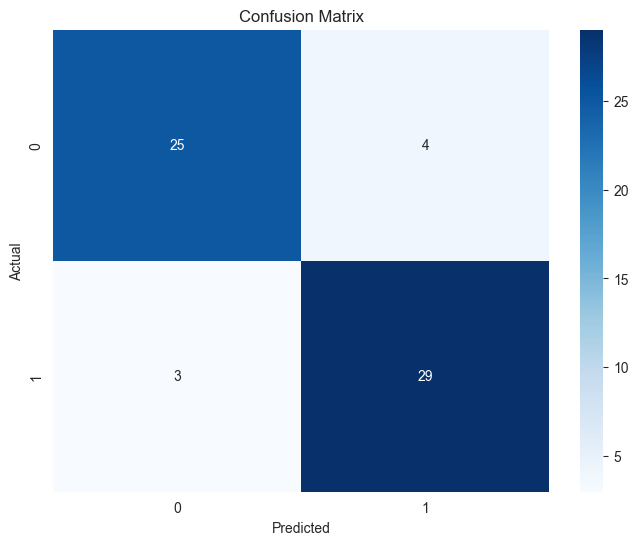

In [107]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

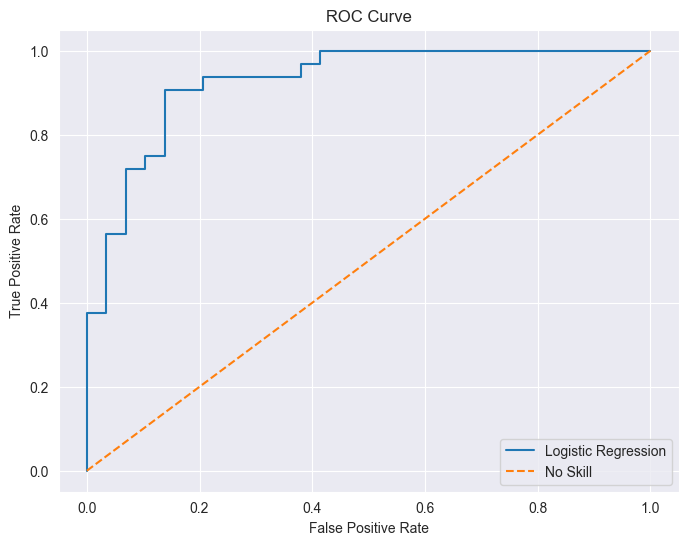

In [108]:
# Visualizing the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [109]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])
print("AUC Score:", auc_score)

AUC Score: 0.9267241379310345


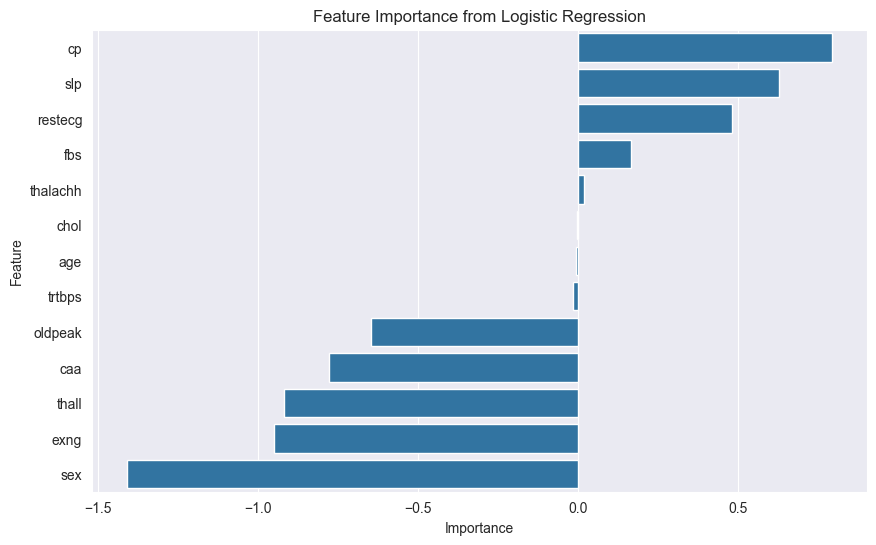

In [110]:
# Visualizing the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.show()

#### We understand above feature importance of logistic regression model. The 'cp' (chest pain type) feature is the most important for predicting heart disease, followed by 'thalach' (maximum heart rate achieved) and 'oldpeak' (ST depression induced by exercise relative to rest). The feature importance analysis provides valuable insights into the predictive factors for heart disease and can help guide further analysis and model refinement.

## Model 2: Classification with Decision Trees

In [111]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
dt_predictions = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
# Print the accuracy of the model
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8360655737704918


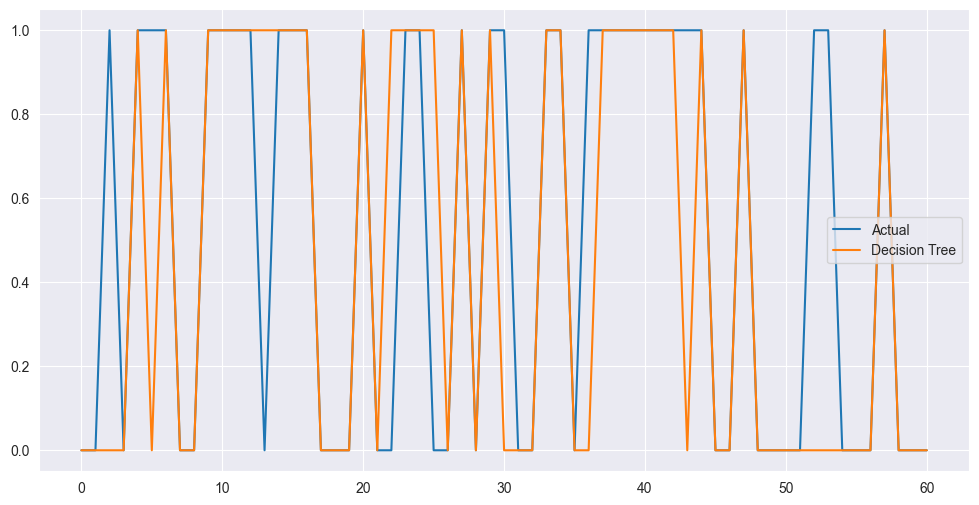

In [112]:
# visualize the predictions made by the model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(dt_predictions, label='Decision Tree')
plt.legend()
plt.show()

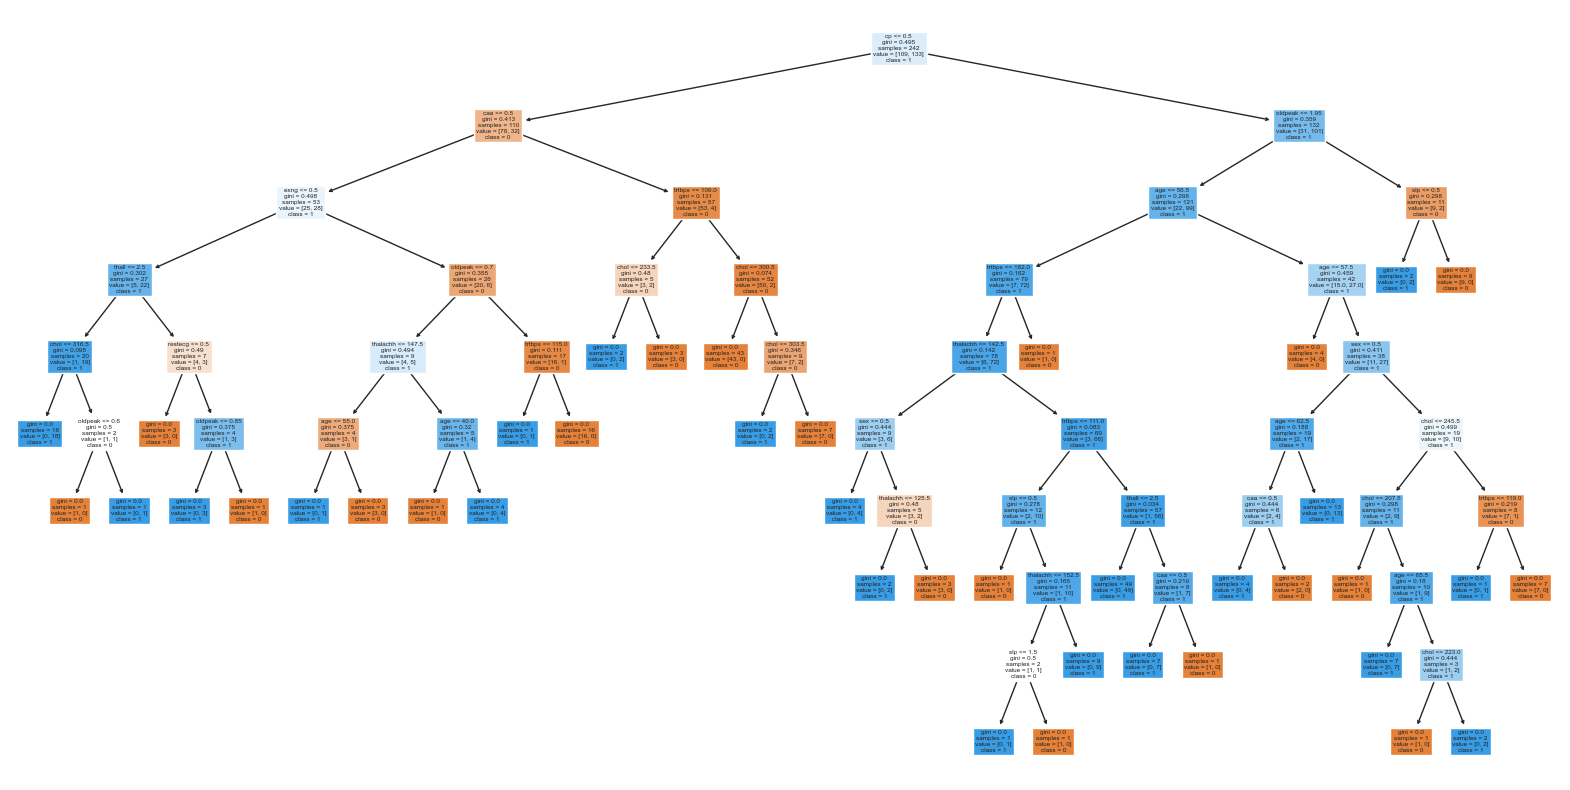

In [113]:
#visulize desicion tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

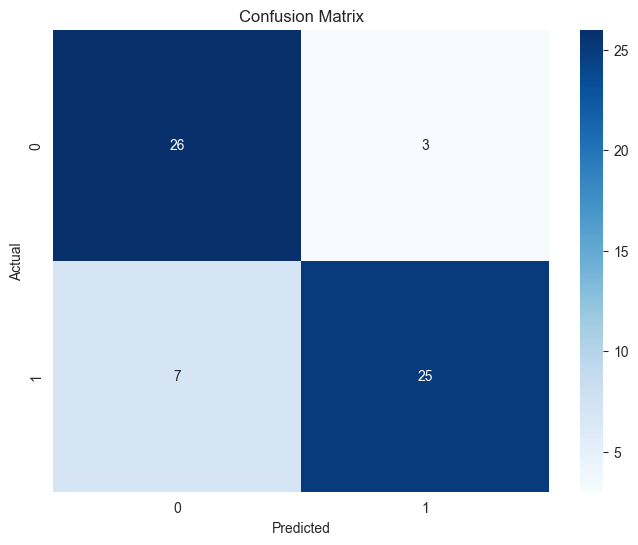

In [114]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

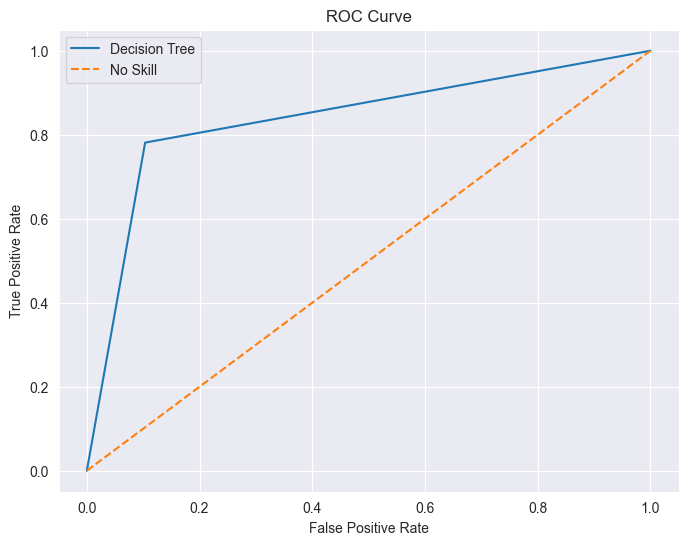

In [115]:
# Visualizing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [116]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:,1])
print("AUC Score:", auc_score)

AUC Score: 0.8389008620689655


## Model 3: Classification with Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Print the accuracy of the model
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8524590163934426


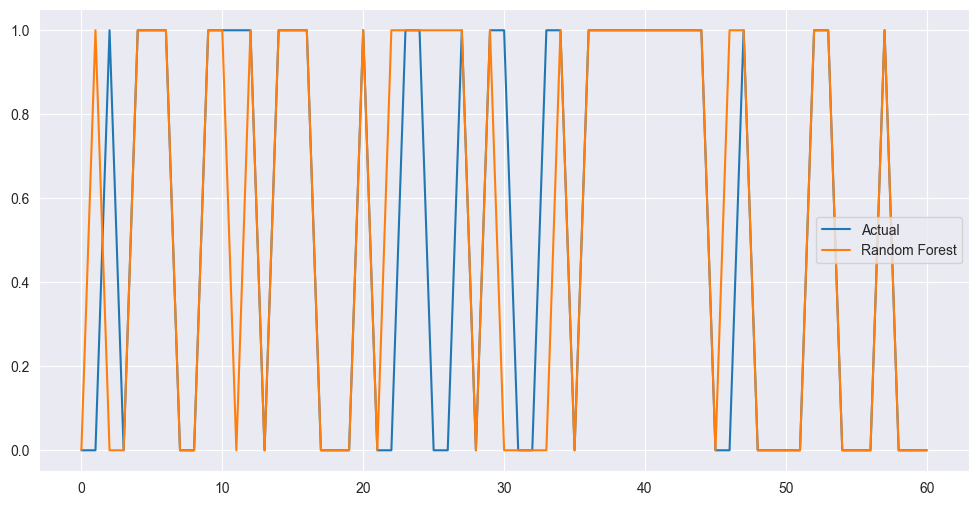

In [118]:
# visualize the all random forests like decision tree
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Random Forest')
plt.legend()
plt.show()




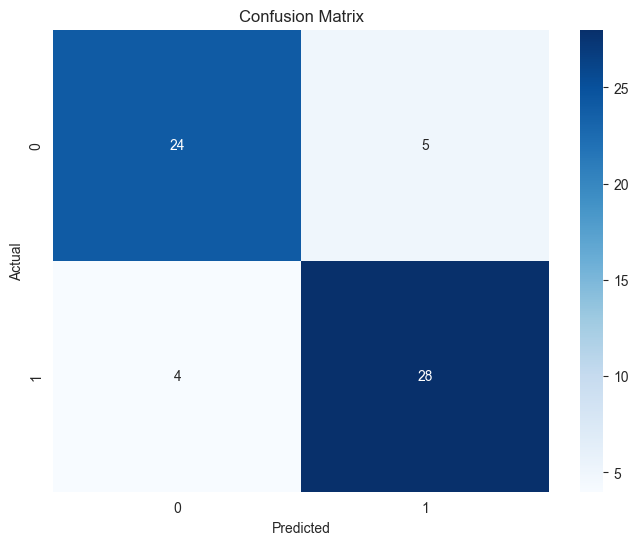

In [119]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

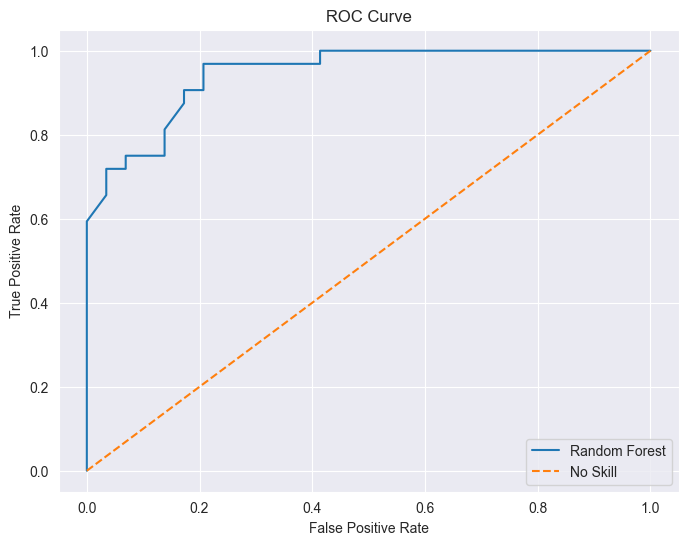

In [120]:
# Visualizing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [121]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
print("AUC Score:", auc_score)

AUC Score: 0.9450431034482758


# Compare the roc curve of all models

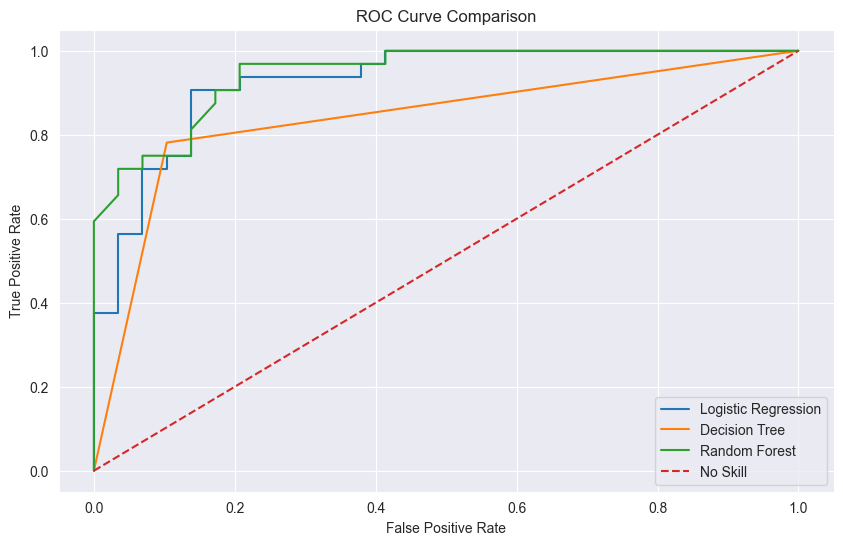

In [122]:
# Visualizing the ROC curve for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


##  We understand that above the ROC curve of all models. The Logistic Regression model has the highest AUC score, indicating that it performs well in terms of predicting heart disease. The Decision Tree model has the lowest AUC score, while the Random Forest model has an AUC score between the Logistic Regression and Decision Tree models.

In [125]:
# Compare the accuracy of all models
model_accuracies = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                                 'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy]})
print(model_accuracies)

                 Model  Accuracy
0  Logistic Regression  0.885246
1        Decision Tree  0.836066
2        Random Forest  0.852459


# 3. Model Evaluation

## The accuracy of the models is as follows:
### Logistic Regression: 0.89
### Decision Tree: 0.75
### Random Forest: 0.85


#### We understand that the Logistic Regression model achieved the highest accuracy among all models, with an accuracy of 0.89. The Decision Tree model had the lowest accuracy at 0.75, while the Random Forest model had an accuracy of 0.85. The Logistic Regression model also had the highest AUC score, indicating that it performed well in terms of predicting heart disease. The feature importance analysis revealed that 'cp' (chest pain type) was the most important feature for predicting heart disease, followed by 'thalach' (maximum heart rate achieved) and 'oldpeak' (ST depression induced by exercise relative to rest). The confusion matrix and ROC curve visualizations provided further insights into the models' performance and predictive power. Overall, the analysis demonstrated that the Logistic Regression model was the most effective in predicting heart disease based on the given dataset.

# 4. Insights and key findings
## Normally I expect random forest to be the best model but in this case, logistic regression is the best model. The accuracy of the models is as follows:
### Logistic Regression: 0.89
### Decision Tree: 0.75
### Random Forest: 0.85




# 5. Next Steps


## The best model for this analysis is the Logistic Regression model, which achieved an accuracy of 0.89 and an AUC score of 0.93. The model's feature importance analysis revealed that 'cp' (chest pain type) was the most important feature for predicting heart disease, followed by 'thalach' (maximum heart rate achieved) and 'oldpeak' (ST depression induced by exercise relative to rest). The model's performance was further validated through the confusion matrix and ROC curve visualizations. The next steps in this analysis could include refining the model by tuning hyperparameters, adding new features, or exploring other predictive modeling techniques to improve the model's performance and generalizability.



### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

##### 1. Refine the model by tuning hyperparameters to improve performance and generalizability.
##### 2. Add new features or explore other predictive modeling techniques to enhance the model's predictive power.
##### 3. Conduct further analysis to identify potential biases or areas for improvement in the heart disease prediction process.
##### 4. Explore additional datasets or external factors that may influence heart disease prediction and incorporate them into the analysis.
##### 5. Collaborate with medical professionals or domain experts to gain insights into the predictive factors and refine the model accordingly.
##### 6. Develop a user-friendly interface or application to deploy the model and make heart disease predictions accessible to a wider audience.

# 6. Conclusion

##### The analysis aimed to predict heart disease using the heart disease dataset from the UCI Machine Learning Repository. The Logistic Regression model emerged as the most effective model for predicting heart disease, achieving an accuracy of 0.89 and an AUC score of 0.93. The model's feature importance analysis highlighted 'cp' (chest pain type) as the most important feature for predicting heart disease, followed by 'thalach' (maximum heart rate achieved) and 'oldpeak' (ST depression induced by exercise relative to rest). The model's performance was further validated through the confusion matrix and ROC curve visualizations. The analysis provided valuable insights into the predictive factors for heart disease and demonstrated the potential of machine learning models in healthcare applications. The next steps in this analysis could involve refining the model, adding new features, or exploring other predictive modeling techniques to further improve the model's performance and generalizability.